In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
df = pd.read_csv("tmdb_5000_movies.csv")
print(df.head())

      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "nam

In [149]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [150]:
# taking a look at number of unique values
print(df.nunique())

budget                   436
genres                  1175
homepage                1691
id                      4803
keywords                4222
original_language         37
original_title          4801
overview                4800
popularity              4802
production_companies    3697
production_countries     469
release_date            3280
revenue                 3297
runtime                  156
spoken_languages         544
status                     3
tagline                 3944
title                   4800
vote_average              71
vote_count              1609
dtype: int64


In [151]:
# closer look at the vote_average values
print(df['vote_average'])  

0       7.2
1       6.9
2       6.3
3       7.6
4       6.1
       ... 
4798    6.6
4799    5.9
4800    7.0
4801    5.7
4802    6.3
Name: vote_average, Length: 4803, dtype: float64


In [152]:
# calculating duplicated values 
print(df.duplicated().sum())

0


In [153]:
print(df.columns)

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')


In [154]:
# dropping unuseful columns
df.drop(['id', 'homepage', 'tagline', 'overview', 'keywords', 'production_companies', 'release_date', 'production_countries', 'status', 'title', 'spoken_languages','original_language'], axis = 1, inplace = True)

In [155]:
# check for data frame shape
print(df.shape)

(4803, 8)


In [156]:
print(df.isnull().sum())

budget            0
genres            0
original_title    0
popularity        0
revenue           0
runtime           2
vote_average      0
vote_count        0
dtype: int64


In [157]:
# dropping NaNs ans confirming excution
df.dropna(inplace= True)
df.isnull().any().sum()

np.int64(0)

In [158]:
# split values in the hyprid dataframe
df['genres'] = df['genres'].apply(lambda x: x.split("|")[0])
print(df.head())

      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                             original_title  popularity     revenue  runtime  \
0                                    Avatar  150.437577  2787965087    162.0   
1  Pirates of the Caribbean: At World's End  139.082615   961000000    169.0   
2                                   Spectre  107.376788   880674609    148.0   
3                     The Dark Knight Rises  112.312950  1084939099    165.0   
4                               John Carter   43.926995   284139100    132.0   

   vote_average  vote_count  
0           7.2       11800  
1           6.9        4500  
2           6.3        446

In [159]:
# adding new column for movie profit (revenue - budget)
df['profit'] = df.revenue - df.budget
print(df.head())

      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                             original_title  popularity     revenue  runtime  \
0                                    Avatar  150.437577  2787965087    162.0   
1  Pirates of the Caribbean: At World's End  139.082615   961000000    169.0   
2                                   Spectre  107.376788   880674609    148.0   
3                     The Dark Knight Rises  112.312950  1084939099    165.0   
4                               John Carter   43.926995   284139100    132.0   

   vote_average  vote_count      profit  
0           7.2       11800  2550965087  
1           6.9        4500   66

In [160]:
def catigorize_col (df, col, labels):
    """
    catigorizes a certain column based on its quartiles

    Args:
        (df)     df   - dataframe we are proccesing
        (col)    str  - to be catigorized column's name
        (labels) list - list of labels from min to max

    Returns:
        (df)     df   - dataframe with the categorized col
    """

    # setting the edges to cut the column accordingly
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]

    df[col] = pd.cut(df[col], edges, labels = labels, duplicates='drop')
    return df

In [161]:
# define labels for these edges
labels = ['not_popular', 'below_avg', 'average', 'popular']
catigorize_col(df, 'vote_average', labels)

df['vote_average'].unique()

['popular', 'average', 'below_avg', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [162]:
# dropping nans and confirming
df.dropna(inplace = True)
print(df.isnull().sum())

budget            0
genres            0
original_title    0
popularity        0
revenue           0
runtime           0
vote_average      0
vote_count        0
profit            0
dtype: int64


In [163]:
# define labels for these edges
labels = ['low', 'average', 'high']
df['profit'] = pd.cut(df['profit'], bins=3, labels=labels)

df['profit'].unique()

['high', 'low', 'average']
Categories (3, object): ['low' < 'average' < 'high']

In [164]:
print(df.head())

      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                             original_title  popularity     revenue  runtime  \
0                                    Avatar  150.437577  2787965087    162.0   
1  Pirates of the Caribbean: At World's End  139.082615   961000000    169.0   
2                                   Spectre  107.376788   880674609    148.0   
3                     The Dark Knight Rises  112.312950  1084939099    165.0   
4                               John Carter   43.926995   284139100    132.0   

  vote_average  vote_count   profit  
0      popular       11800     high  
1      popular        4500      low  
2 

In [165]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4739 entries, 0 to 4802
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   budget          4739 non-null   int64   
 1   genres          4739 non-null   object  
 2   original_title  4739 non-null   object  
 3   popularity      4739 non-null   float64 
 4   revenue         4739 non-null   int64   
 5   runtime         4739 non-null   float64 
 6   vote_average    4739 non-null   category
 7   vote_count      4739 non-null   int64   
 8   profit          4739 non-null   category
dtypes: category(2), float64(2), int64(3), object(2)
memory usage: 305.8+ KB
None


In [166]:
Q1: Do movies with high popularity achive high revenvue?
# get median of popularity to compare with
median_popularity = df['popularity'].median()

In [167]:
less_popular = df.query('popularity <= @median_popularity')
more_popular = df.query('popularity > @median_popularity')

# Step 3: calculate mean revenue for both groups
print("Mean revenue of less popular movies:", less_popular['revenue'].mean())
print("Mean revenue of more popular movies:", more_popular['revenue'].mean())

Mean revenue of less popular movies: 12834465.635021098
Mean revenue of more popular movies: 153938433.95989868


In [168]:
import ast

def convert_to_list(x):
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)  # convert string to list/dict
        except:
            return []
    elif isinstance(x, list):
        return x
    else:
        return []

# Apply conversion
df['genres'] = df['genres'].apply(convert_to_list)

# Now extract only names
df['genres'] = df['genres'].apply(lambda x: [g['name'] for g in x if isinstance(g, dict)])


In [169]:
print(df['genres'])

0       [Action, Adventure, Fantasy, Science Fiction]
1                        [Adventure, Fantasy, Action]
2                          [Action, Adventure, Crime]
3                    [Action, Crime, Drama, Thriller]
4                [Action, Adventure, Science Fiction]
                            ...                      
4798                        [Action, Crime, Thriller]
4799                                [Comedy, Romance]
4800               [Comedy, Drama, Romance, TV Movie]
4801                                               []
4802                                    [Documentary]
Name: genres, Length: 4739, dtype: object


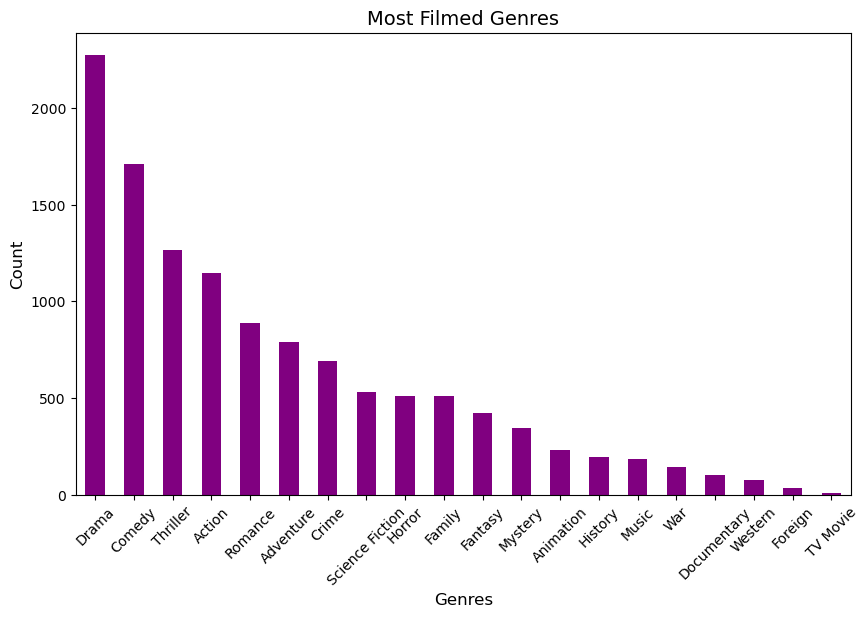

In [170]:
# Step 3: Remove rows with empty genre lists
df_filtered = df[df['genres'].str.len() > 0]

# Step 4: Explode the lists so each genre is in a separate row
all_genres = df_filtered['genres'].explode()

# Step 5: Count occurrences
genre_counts = all_genres.value_counts()

#Q2: What are the most filmed genres in this whole dataset?
# Step 6: Plot safely
if not genre_counts.empty:
    plt.figure(figsize=(10,6))
    genre_counts.plot(kind='bar', color='purple')
    plt.title("Most Filmed Genres", fontsize=14)
    plt.xlabel("Genres", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No genres available to plot.")

In [171]:
df['genres'].describe()

count        4739
unique       1172
top       [Drama]
freq          361
Name: genres, dtype: object

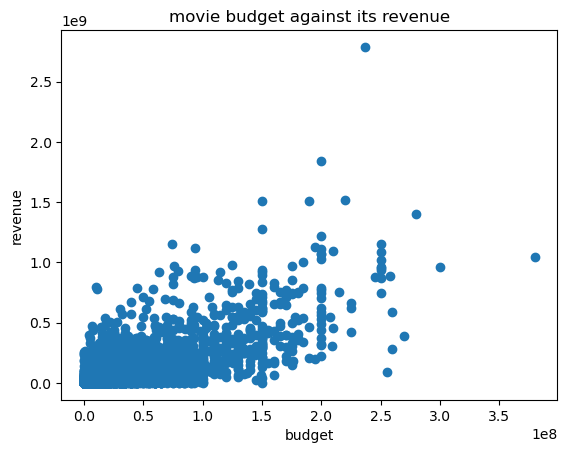

In [172]:
Q3: Is there a correlation between a movie budget and its revenue?
# plotting budget against revenue
plt.scatter(df['budget'],df['revenue']);
plt.title("movie budget against its revenue");
plt.xlabel('budget', fontsize=10);
plt.ylabel('revenue',fontsize=10);